# 2022 Day 8

https://adventofcode.com/2022/day/8

https://adventofcode.com/2022/day/8/input

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
test_inp = """
30373
25512
65332
33549
35390
""".strip().split('\n')

In [3]:
inp = open('input-08.txt').read().strip().split('\n')

## Part 1

In [4]:
def visible_n(X, n):
    X = X + 1
    X = np.rot90(X, n)
    out = X > np.pad(np.maximum.accumulate(X, axis=0), 1)[:-2, 1:-1]
    out = np.rot90(out, -n)
    return out

def visible(X):
    return visible_n(X, 0) | visible_n(X, 1) | visible_n(X, 2) | visible_n(X, 3)

In [5]:
tX = np.array([list(line) for line in test_inp]).astype(int)
tV = visible(tX)
tV.sum()

21

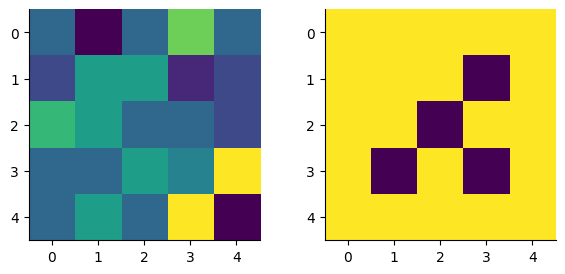

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(7,3))
axs[0].imshow(tX)
axs[1].imshow(tV)

In [7]:
X = np.array([list(line) for line in inp]).astype(int)
V = visible(X)
V.sum()

1818

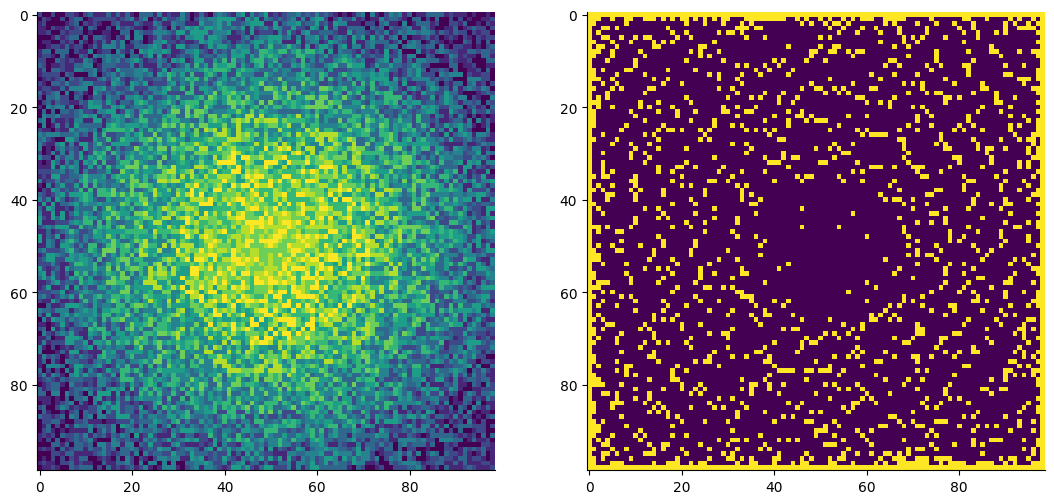

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(13,6))
axs[0].imshow(X)
axs[1].imshow(V)

## Part 2

In [9]:
n = 5
np.where((tX == n) * 1)

(array([1, 1, 2, 3, 4]), array([1, 2, 1, 2, 1]))

In [10]:
(tX >= n) * 1

array([[0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0]])

In [11]:
tX[tuple(np.array([2,2]))]

3

In [12]:
def check_dist(X, i, j):
    Ni, Nj = X.shape
    X0 = X[i, j]
    ij0 = np.array([i, j])
    directions = np.array([
        [0, 1],
        [1, 0],
        [0, -1],
        [-1, 0],
    ])
    score = 1
    for direction in directions:
        ij = ij0.copy()
        dist = 0
        while 1 <= ij[0] < Ni-1 and 1 <= ij[1] < Nj-1:
            ij += direction
            dist += 1
            if X[tuple(ij)] >= X0:
                break
        score *= dist
    return score

In [13]:
check_dist(tX, 3, 2)

8

In [14]:
tNi, tNj = tX.shape
max(check_dist(tX, i, j) for i in range(tNi) for j in range(tNj))

8

In [15]:
Ni, Nj = X.shape
max(check_dist(X, i, j) for i in range(Ni) for j in range(Nj))

368368